Health insurance as become a neccesity for human.It is a  vital element of both financial stability and access to healthcare.There are various factors that play important roles in health insurance such as age,BMI,region among others which help in evaluating the value and necessity of health insurance.

It is crucial for individuals, insurers, and governments to comprehend the dynamics of these factors. As it supports accurate risk profile assessment, the creation of policies that strike a balance between cost and coverage, and the customization of insurance plans to meet a variety of demands. 

By examining these variables, i can gain understanding of the complex interactions that influence insurance charges, which can help stackholders develop more specialized and efficient insurance plans.


# DATA PREPROCESSING

# DATA SOURCE
Medical cost Personal Dataset from Kaggle
https://www.kaggle.com/datasets/mirichoi0218/insurance/data

In [178]:
#importing libraries
import pandas as pd

In [179]:
#importing dataset
data = pd.read_csv("insur.csv")

In [180]:
#a view of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This shows the first five rows of the dataset, the data has 7 attributes.

In [181]:
# i am checking with the code if there are null data value in my dataset.
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

There are no null value in the dataset

In [182]:
# I am checking for duplicate value in my dataset
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

Recoding the categorical values using label encoder

In [183]:
#recoding sex
#using label encoding

from sklearn.preprocessing import LabelEncoder
# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Choose the column to encode
column_to_encode = 'sex'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the selected column and store the encoded values in a new column
data[column_to_encode + '_encoded'] = label_encoder.fit_transform(data[column_to_encode])

# Display the DataFrame with the newly added encoded column
print(data)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      sex_encoded  
0               0  
1               1  
2               1  
3               1  
4               1  
...           ...  
1333            1  

 For this female is recoded to 0 and male to 1

In [184]:
#recoding region
#using label encoding

from sklearn.preprocessing import LabelEncoder
# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Choose the column to encode
column_to_encode = 'region'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the selected column and store the encoded values in a new column
data[column_to_encode + '_encoded'] = label_encoder.fit_transform(data[column_to_encode])

# Display the DataFrame with the newly added encoded column
print(data)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      sex_encoded  region_encoded  
0               0               3  
1               1               2  
2               1               2  
3              

northwest is encoded to 1, south east to 2, south west to3 and north east to 4

In [185]:
#recoding smoker
#using label encoding

from sklearn.preprocessing import LabelEncoder
# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Choose the column to encode
column_to_encode = 'smoker'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the selected column and store the encoded values in a new column
data[column_to_encode + '_encoded'] = label_encoder.fit_transform(data[column_to_encode])

# Display the DataFrame with the newly added encoded column
print(data)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      sex_encoded  region_encoded  smoker_encoded  
0               0               3               1  
1               1               2               0  
2  

individual who answered yes to smoking was encoded to 1 and not spoking encoded to 0

Dropping of attributes that are not needed for analysis after coding

In [186]:
# Dropping multiple columns to retain columns needed for analysis after recoding
columns_to_drop = ['sex', 'region', 'smoker']
existing_columns = set(data.columns)
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]
data = data.drop(columns=columns_to_drop)
print(data)

      age     bmi  children      charges  sex_encoded  region_encoded  \
0      19  27.900         0  16884.92400            0               3   
1      18  33.770         1   1725.55230            1               2   
2      28  33.000         3   4449.46200            1               2   
3      33  22.705         0  21984.47061            1               1   
4      32  28.880         0   3866.85520            1               1   
...   ...     ...       ...          ...          ...             ...   
1333   50  30.970         3  10600.54830            1               1   
1334   18  31.920         0   2205.98080            0               0   
1335   18  36.850         0   1629.83350            0               2   
1336   21  25.800         0   2007.94500            0               3   
1337   61  29.070         0  29141.36030            0               1   

      smoker_encoded  
0                  1  
1                  0  
2                  0  
3                  0  
4       

Renaming dataset for consistency and uniformity in analysis

In [187]:
#Renaming my dataset in multiple column in a list
data.rename(columns={'region_encoded': 'region', 'sex_encoded': 'sex', 'smoker_encoded': 'smoker'}, inplace=True)

In [188]:
#display the new dataset set
data

,age,bmi,children,charges,sex,region,smoker
0,19,27.900,0,16884.92400,0,3,1
1,18,33.770,1,1725.55230,1,2,0
2,28,33.000,3,4449.46200,1,2,0
3,33,22.705,0,21984.47061,1,1,0
4,32,28.880,0,3866.85520,1,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,2,0
1336,21,25.800,0,2007.94500,0,3,0


In [189]:
#check data type
# i want to know the data type for each atrributes.
data.dtypes

age           int64
bmi         float64
children      int64
charges     float64
sex           int32
region        int32
smoker        int32
dtype: object

In [190]:
#A summary of the dataset
data.describe()

,age,bmi,children,charges,sex,region,smoker
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,1.515695,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.500160,1.104885,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,2.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,2.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,3.000000,1.000000


In [191]:
#checking for correclation between the variables
data.corr()

,age,bmi,children,charges,sex,region,smoker
age,1.000000,0.109272,0.042469,0.299008,-0.020856,0.002127,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.157566,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.016569,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,-0.006208,0.787251
sex,-0.020856,0.046371,0.017163,0.057292,1.000000,0.004588,0.076185
region,0.002127,0.157566,0.016569,-0.006208,0.004588,1.000000,-0.002181
smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,-0.002181,1.000000


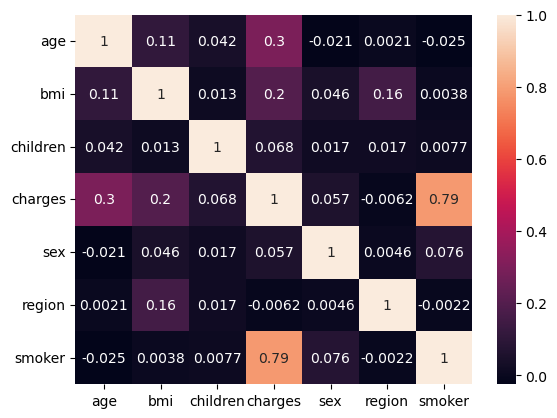

In [192]:
#just to visuslize the correlation
import seaborn as sns
# use all the cleaned dataset 

corr = data.corr() #use the clean dataset

sns.heatmap(corr, annot=True) #annotates each cell with its correlation value
plt.show()

I used the heatplot to show the correlation between the variables

In [193]:
#exporting the processed dataset in csv format
data.to_csv("C:\\Users\\olaiy\\Desktop\\newinsurance.csv")

Fittiing of the linear and multiple regression

In [194]:
#importing  libraries for regression analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

 # HYPOTHESIS ONE
 
 Analyzing the data would aid Investigating the influence of several demographic factors (age, sex,
region, and smoking status) on insurance charges.

Visualization of charges and factors(age,sex,smoker and region)

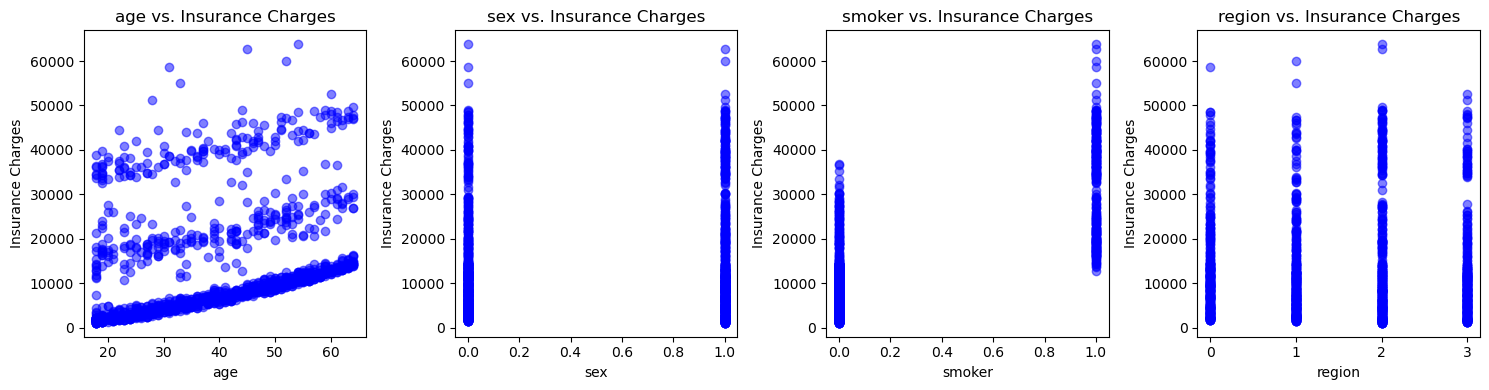

In [195]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# Extracting independent variables (features) and dependent variable
X = data[['age', 'sex', 'smoker', 'region']] # INDEPENDENT VARIABLES
y = data['charges']  #  dependent variable

# Create subplots for individual scatter plots
num_cols = len(X.columns)
fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(15, 4))  # Adjust figsize as needed

# Loop through each independent variable and plot against the dependent variable
for i, col in enumerate(X.columns):
    axs[i].scatter(X[col], y, color='blue', alpha=0.5)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Insurance Charges')
    axs[i].set_title(f'{col} vs. Insurance Charges')

plt.tight_layout()
plt.show()

fitting multiple regression for changes and factors(age,sex,smoker and region)

In [196]:
import statsmodels.api as sm

#define response variable
y = data['charges']

#define predictor variables
x = data[['age', 'sex', 'region', 'smoker']] # this is the multiple independent variables selection

#adding constant to predictor variables
x = sm.add_constant(x)

#fitting linear regression model
model = sm.OLS(y, x).fit()

# This will analyze a statical regression and will return a p-value.

In [197]:
#view model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     863.1
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:04:20   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.726e+04
Df Residuals:                    1333   BIC:                         2.728e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2348.2958    607.227     -3.867      0.0

# Interpretation 

Approximately 72.1% of the variation in the insurance charges can be explained by the model.
This suggests a relatively good fit and that around 72.1% of the variation in insurance
charges can be explained by the factors provided.

Pvalue: The model's overall significance is tested by p value. When the p-value is low, 
it indicates that at least one independent variable plays a major role in the explanation of the dependent variable.
The model is statistically significant in this case since the p-value is extremely low.


Coefficient interpretation

Age: The average increases in insurance charges is about 274.94 for every unit increase in age.
Sex: The coefficient indicates that the association between insurance costs and 
sex is not statistically significant. The high p-value (0.814) suggests that there is no 
statistically meaningful relationship between sex and charges.This ia also the same for region with 
high p-value (0.721).
Smokers: Insurance costs are greatly impacted by smoking.
Smokers typically pay considerably more than non-smokers, with an average cost of almost $23,850.

Conclusion: Age and smokers have a significant impact on charges while sex and regioon are not
Insurance firms can use these data to evaluate risk factors and set rates. 
such as when adjusting insurance prices, companies may take into account characteristics 
such as age and smoking history, while other aspects may not have as much of an impact.




# HYPOTHESIS TWO
The analysis will help predict the relationship between the number of children and Insurance
charges

Visualization of linear regression for Charges and and BMI

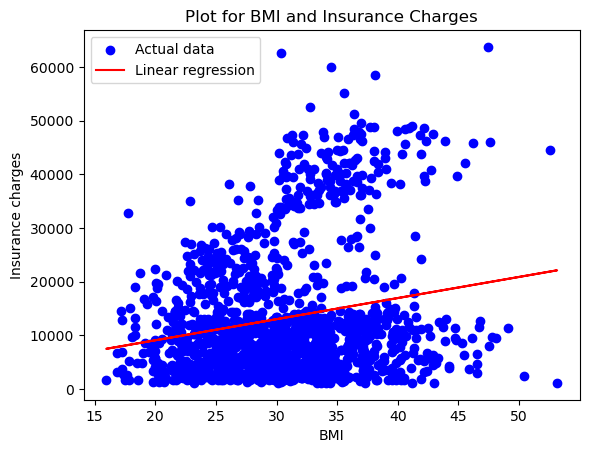

In [198]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extracting columns from your DataFrame
X = data['bmi']  #  independent variable
y = data['charges']  #  dependent variable

# Reshape X for sklearn (if X has a single feature)
X = X.values.reshape(-1, 1)

# Instantiate and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values based on the model
y_pred = model.predict(X)

# Plotting the original data points
plt.scatter(X, y, color='blue', label='Actual data')

# Plotting the regression line
plt.plot(X, y_pred, color='red', label='Linear regression')

# Labels and title
plt.xlabel('BMI')
plt.ylabel('Insurance charges')
plt.title('Plot for BMI and Insurance Charges')

# Show legend
plt.legend()

# Display the plot
plt.show()

Fitting linear regression for charges and BMI

In [199]:
import statsmodels.api as sm

#define response variable
y = data['charges']

#define predictor variables
x = data[['bmi']] # this is the  independent variables selection

#adding constant to predictor variables
x = sm.add_constant(x)

#fitting linear regression model
model = sm.OLS(y, x).fit()

# This will compute a statical regression and will return a p-value.


In [200]:
#view model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           2.46e-13
Time:                        21:04:21   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.4

# Interpretation

R Squared: Approximately 3.9% of the variation in insurance charges may be explained by the model. 
This suggests that BMI alone accounts for just around 3.9% of the variation in insurance costs.

Coefficient: The insurance costs  rise by about $393.87 for every unit increase in BMI.Although BMI is not the only factor influencing insurance cost.


# HYPOTHESIS 3
The analysis will help determine if BMI influences insurance charges.

Visualization of linear regression for charges and children

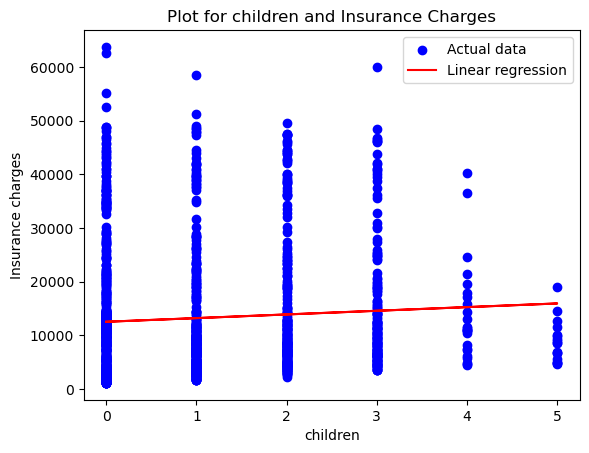

In [201]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extracting columns from your DataFrame
X = data['children']  #  independent variable
y = data['charges']  #  dependent variable

# Reshape X for sklearn (if X has a single feature)
X = X.values.reshape(-1, 1)

# Instantiate and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values based on the model
y_pred = model.predict(X)

# Plotting the original data points
plt.scatter(X, y, color='blue', label='Actual data')

# Plotting the regression line
plt.plot(X, y_pred, color='red', label='Linear regression')

# Labels and title
plt.xlabel('children')
plt.ylabel('Insurance charges')
plt.title('Plot for children and Insurance Charges')

# Show legend
plt.legend()

# Display the plot
plt.show()

Fitting linear regression for charges and children

In [202]:
import statsmodels.api as sm

#define response variable
y = data['charges']

#define predictor variables
x = data[['children']] # this is the independent variable 

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

# This will compute a statical regression and will return a p-value.

In [203]:
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.206
Date:                Thu, 04 Jan 2024   Prob (F-statistic):             0.0129
Time:                        21:04:21   Log-Likelihood:                -14475.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1336   BIC:                         2.896e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.252e+04    446.450     28.049      0.0

# Interpretation

Coefficient: Insurance charges are predicted to rise by about $683.09 for every additional child, 
assuming all other factors constant.

The model appears to be statistically significant based on the low p-value of 0.0129. Nevertheless, in spite of statistical significance,  the R square is low. Hence number of children influences insurance charges



 # Cross avalidation

In [204]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


#  'X' contains independent variables and 'y' is the dependent variable
X = data[['age', 'sex', 'region', 'smoker', 'children']]
y = data['charges']

# Initialize Linear Regression model
model = LinearRegression()

# Perform cross-validation (using 5-fold cross-validation as an example)
scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 'r2' for R-squared

# Print cross-validation scores
print("Cross-Validation Scores:", scores)
print(f"Mean R-squared: {scores.mean():.4f}")

Cross-Validation Scores: [0.73783998 0.68784856 0.74179707 0.70410276 0.73043934]
Mean R-squared: 0.7204


This suggests that 72.04% of the variation in the target variable can be explained by the model on average.
These evaluations indicate the model's dependability and generalizability to new data. 

# Conclusion

The analysis has shown the factors that are significant with the dependent variable(Insurance Charges).Age, BMI, smoking habits, and the number of children are unique,significant factors and key determinanats to predict insurance charges. This shows how crucial these factors are in determining insurance charges that is keeping a healthy BMI, quitting smoking, and the size of the family all have a significant impact on insurance charges.
Making well-informed decisions and reducing insurance charges can both be achieved by acknowledging and taking these considerations into account.


